In [ ]:
#Biblotheken
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

ModuleNotFoundError: No module named 'pylandau'

In [6]:
print(np.__version__)

2.0.0


NameError: name 'pylandau' is not defined

In [7]:
#Makroparamter für Plots
plt.rcParams.update({'font.size': 18})
plt.style.use(['science', 'bright'])

# Energieeichung

Aufnahme von Co60 Spektrum, zum einschätzen des Energiebereichs

In [8]:
enEich = pd.read_csv("data/Gammaspektrum_Energieeichung_Co60.dat", names= ["intens"])

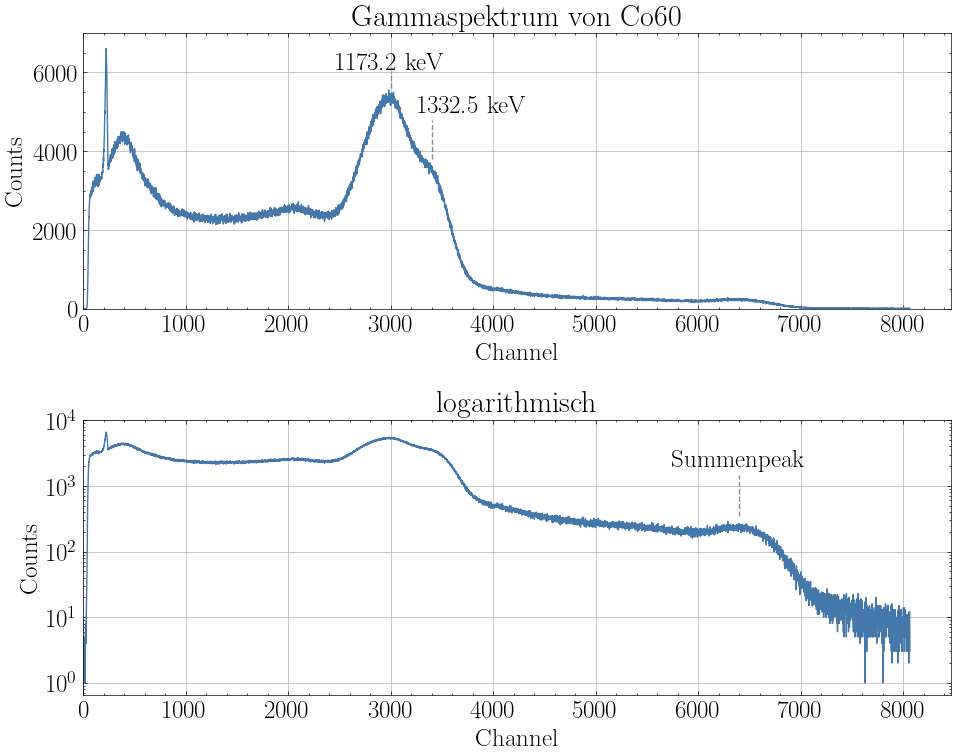

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(enEich)
axs[0].set_title("Gammaspektrum von Co60")

axs[0].axvline(x=3000,ymin=(5600/7000), ymax=(6000/7000), color = "gray",alpha = 0.9,ls = "dashed")
axs[0].text(3000, 6100,"1173.2 keV " ,horizontalalignment = "center")

axs[0].axvline(x=3400,ymin=(3800/7000), ymax=(4800/7000), color = "gray",alpha = 0.9,ls = "dashed")
axs[0].text(3800, 5000,"1332.5 keV " ,horizontalalignment = "center")

axs[0].set_xlim(left=0)
axs[0].set_ylim(bottom=0, top = 7000)
axs[0].set_xlabel("Channel")
axs[0].set_ylabel("Counts")
axs[0].grid()

axs[1].plot(enEich)
axs[1].set_title("logarithmisch")

axs[1].axvline(x=6400,ymin=(0.65), ymax=(0.8), color = "gray",alpha = 0.9,ls = "dashed")
axs[1].text(6400, 2000,"Summenpeak" ,horizontalalignment = "center")

axs[1].set_xlim(left=0)
#axs[1].set_ylim(bottom=0)
axs[1].set_xlabel("Channel")
axs[1].set_ylabel("Counts")
axs[1].set_yscale("log")
axs[1].grid()

fig.tight_layout()

plt.savefig("bilder/GammaCo60.pdf")


# gesamter Energiebereich

In [10]:
gesEn = pd.read_csv("data/gesamterEnergiebereich.dat", names= ["intens"])

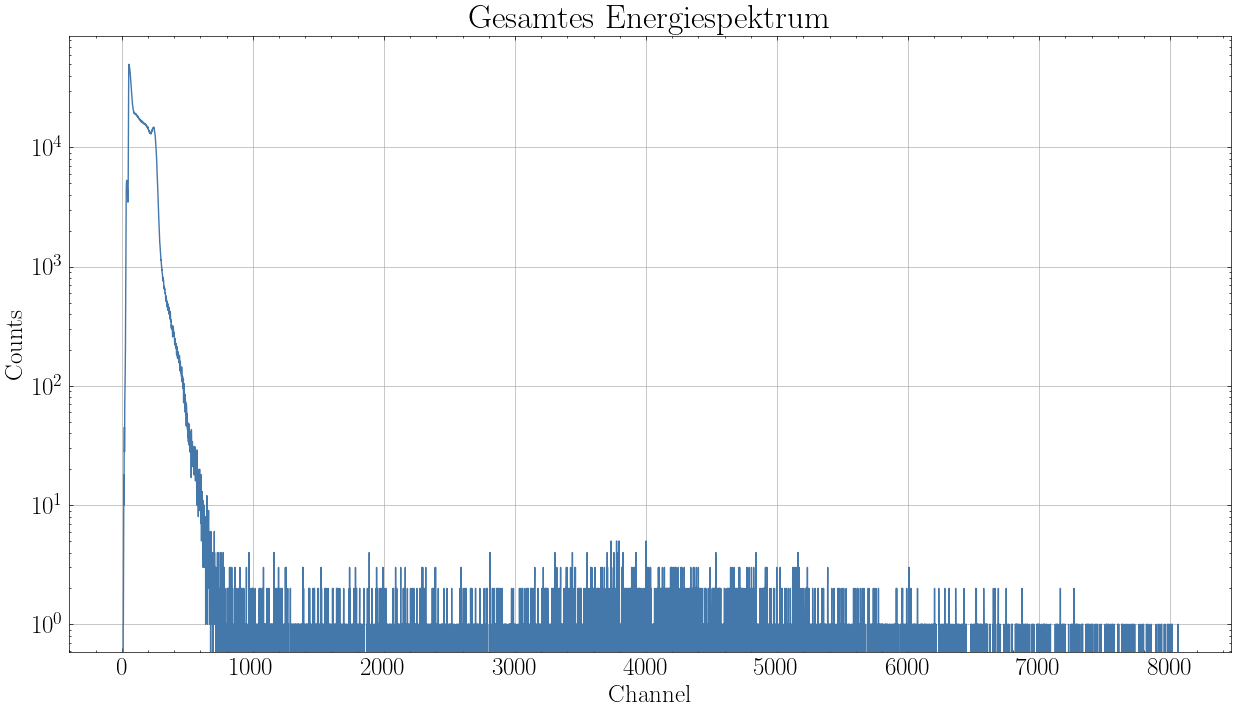

In [11]:
fig = plt.figure(figsize=[15,8], dpi=100)
ax = fig.add_subplot(111)
ax.plot(gesEn, label = "Messdaten")
ax.set_xlabel("Channel")
ax.set_ylabel("Counts")
ax.set_title("Gesamtes Energiespektrum",fontsize = 24)
ax.set_yscale("log")
ax.grid()
plt.savefig("bilder/gesamterEnBereich.pdf")

In [12]:
gesEn = gesEn.groupby(gesEn.index // 16).sum()

In [13]:
bin_centers = np.array([float(i) for i in range(160,500,1)])

In [14]:
hist = gesEn.intens[160:500]

In [15]:
# Fit mit curve_fit
coeff, pcov = curve_fit(pylandau.langau, bin_centers, hist,p0=(250, 11, 80, 12),bounds=(1, 10000))

NameError: name 'pylandau' is not defined

In [16]:
bin_centers2 = np.array([float(i) for i in range(20,500,1)])

In [17]:
coeff

NameError: name 'coeff' is not defined

NameError: name 'pylandau' is not defined

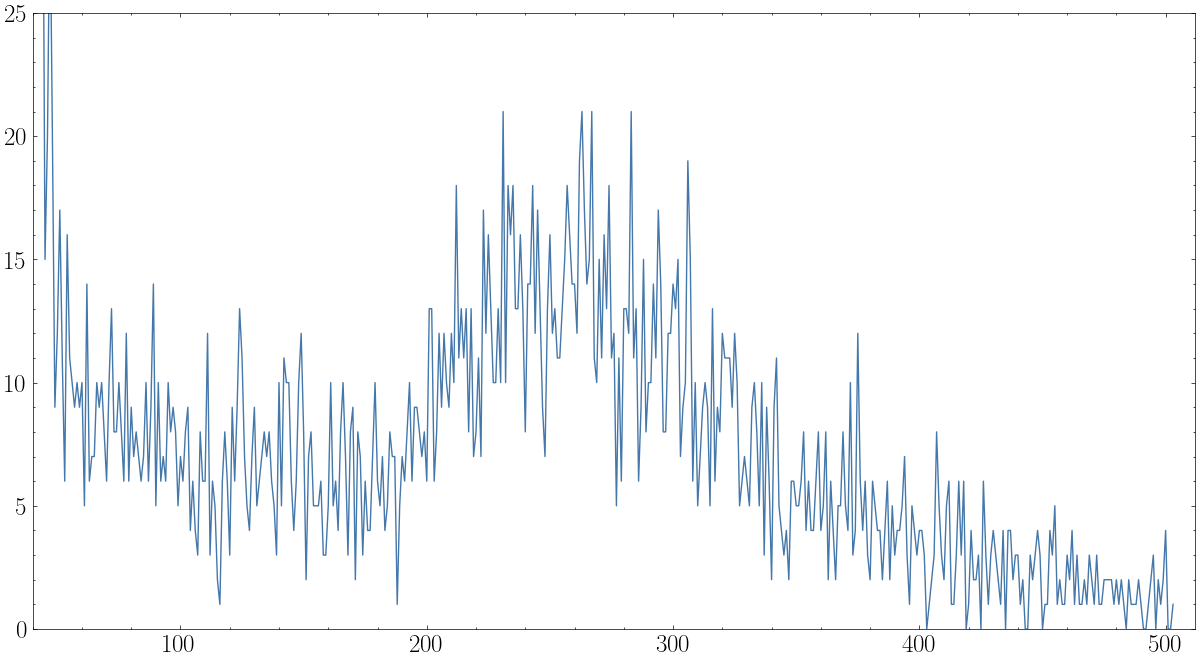

In [18]:
fig = plt.figure(figsize=[15,8], dpi=100)
ax = fig.add_subplot(111)
ax.set_xlim(xmin = 40, xmax = 512)
#ax.set_yscale("log")
ax.set_ylim(ymax= 25)
ax.plot(gesEn, label = "Messdaten")
ax.plot(bin_centers2, pylandau.langau(bin_centers2,*coeff), "-", linewidth = 2, label = "Fit mit Landauverteilung")
ax.set_xlabel("Channel")
ax.set_ylabel("Counts")
ax.set_title("Energiespektrum der Myonen",fontsize = 24)
ax.grid()
ax.legend()
#ax.set_yscale("log")
plt.savefig("bilder/MyonenLandau_bad.pdf") ## hier hab ich den namen geändert um die gute datei nicht zu überschreiben


# Zeiteichung

In [19]:
zeitEich = pd.read_csv("data/Zeiteichung.dat", names= ["intens"], dtype=float)

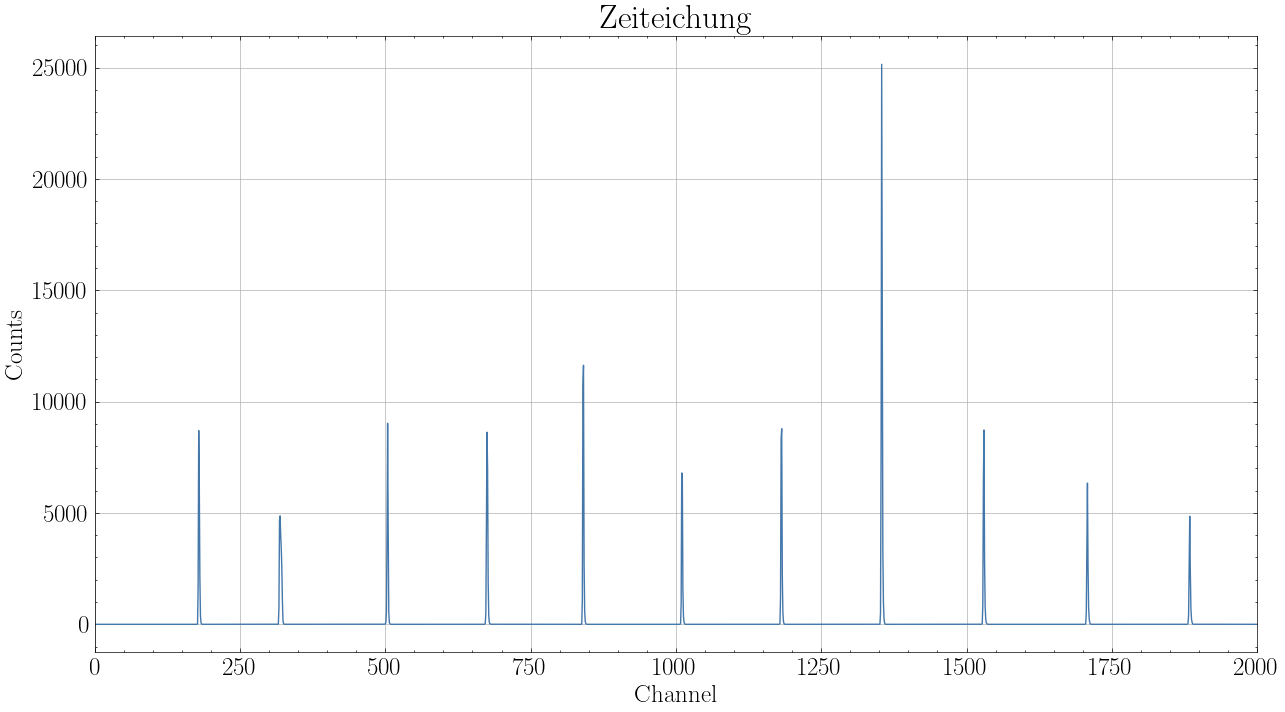

In [20]:
fig = plt.figure(figsize=[15,8], dpi=100)
ax = fig.add_subplot(111)
ax.set_xlim(xmin = 0, xmax = 2000)
#ax.set_yscale("log")
#ax.set_ylim(ymin= 0,ymax = 26000)
ax.plot(zeitEich)

ax.set_xlabel("Channel")
ax.set_ylabel("Counts")
ax.set_title("Zeiteichung",fontsize = 24)

ax.grid()

plt.savefig("bilder/zeitEich.pdf")


Es folgt die Funktion fitTime(), um die Peaks mittels eines gauss zu fitten. Anschließend werden alle zusammen in einem grid geplottet.

In [21]:
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [22]:
def fitTime(ax,start,stop): #170,190

    t = np.linspace(start,stop-1,20)
    data = np.asarray(zeitEich.intens[start:stop])

    popt,pcov = curve_fit(gauss,t,data,p0=[max(data),np.mean(t),1])
    perr = np.sqrt(np.diag(pcov))

    ax.set_xlim(xmin = start, xmax = stop)
    #ax.set_yscale("log")
    ax.set_ylim(ymin= -500,ymax = max(data) + 0.4*max(data))
    t_fine = np.linspace(start,stop,500)
    ax.plot(zeitEich, '+', markersize  = 10)
    ax.plot(t_fine,gauss(t_fine,*popt),'r',label='fit')


    ax.text(popt[1]+6, 0.95*popt[0],"A = %.3f ± %.3f  \n   $\mu$ = %.3f ± %.3f \n  $\sigma$ = %.3f ± %.3f"%(popt[0],perr[0],popt[1],perr[1],popt[2],perr[2]),
            horizontalalignment = "center", verticalalignment = "center",  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

    ax.set_xlabel("Channel")
    ax.set_ylabel("Counts")
    #ax.set_title("Zeiteichung",fontsize = 24)

    ax.grid()


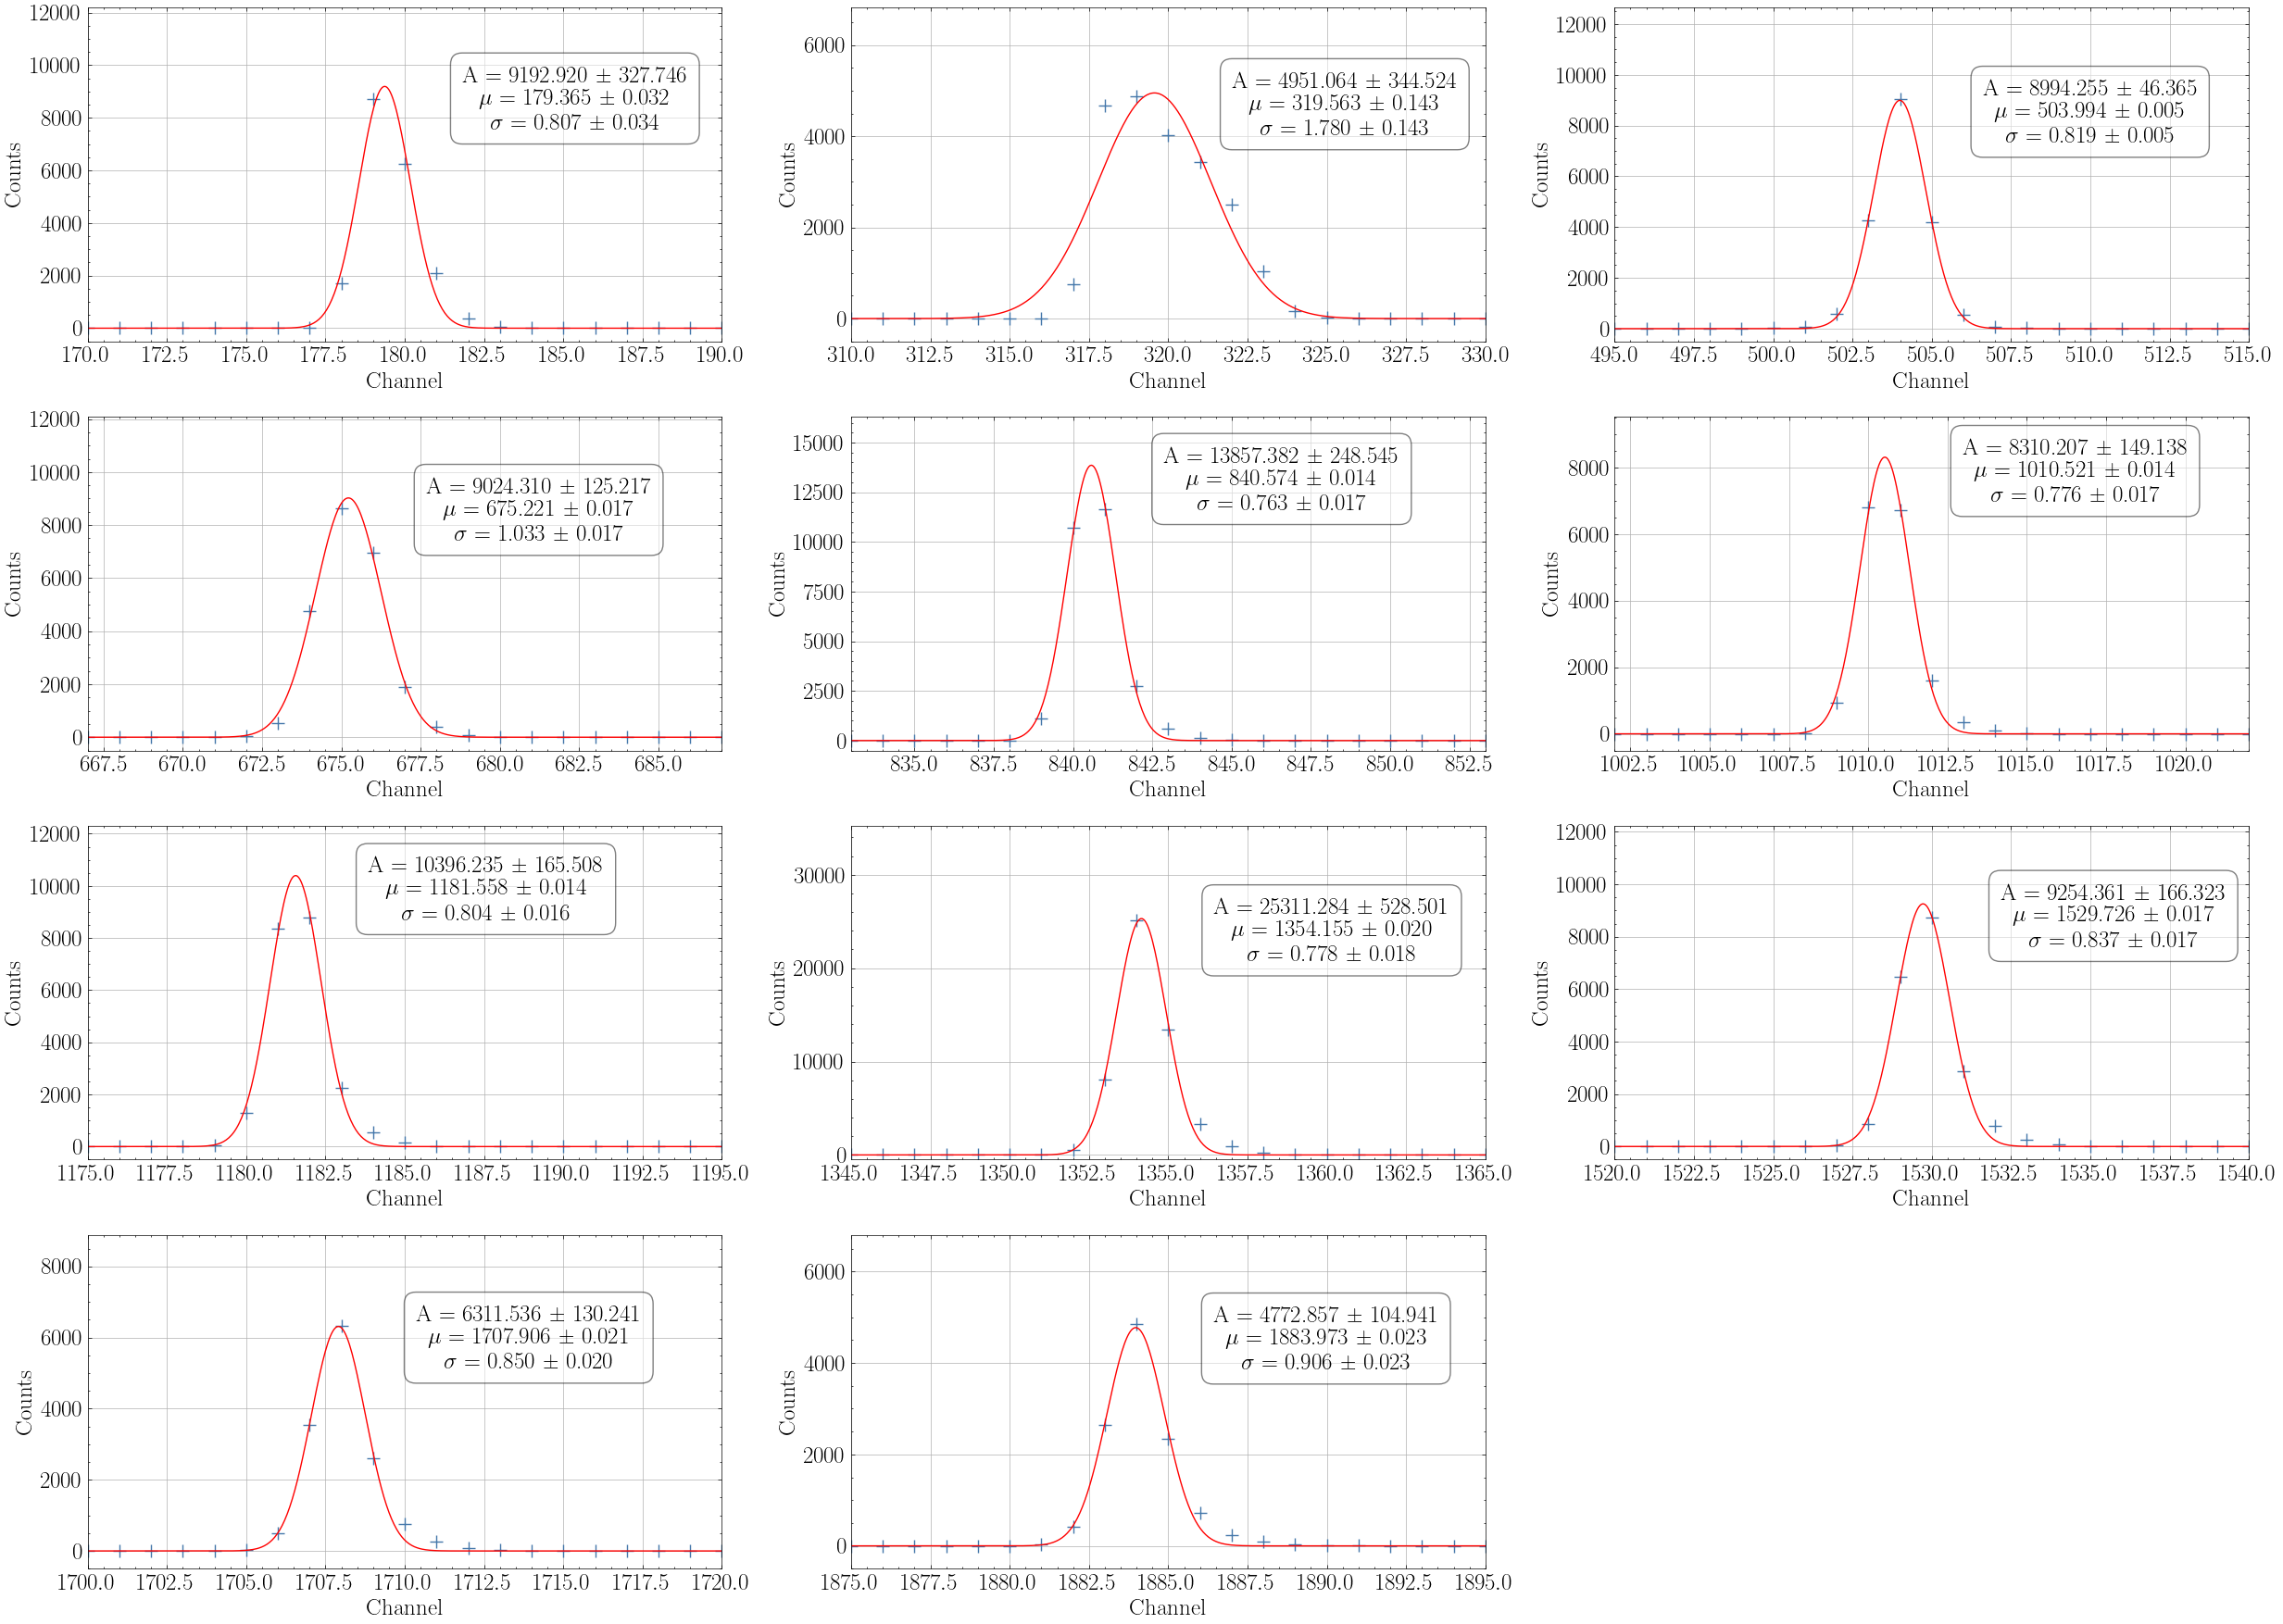

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 18))

fitTime(axes[0, 0],170,190)
fitTime(axes[0, 1],310,330)
fitTime(axes[0, 2],495,515)

fitTime(axes[1, 0],667,687)
fitTime(axes[1, 1],833,853)
fitTime(axes[1, 2],1002,1022)

fitTime(axes[2, 0],1175,1195)
fitTime(axes[2, 1],1345,1365)
fitTime(axes[2, 2],1520,1540)

fitTime(axes[3, 0],1700,1720)
fitTime(axes[3, 1],1875,1895)
axes[3, 2].set_visible(False)
fig.tight_layout()

plt.savefig("bilder/timeGaussFits.pdf")

## Zeiteichung -- Geradenfit

In [24]:
def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

In [25]:
channels =  np.array([179.365, 319.563, 503.994, 675.221,840.574,1010.521,1181.558,1354.155,1529.726,1707.906,1883.973])
channels_err =  np.array([0.032,0.143,0.005,0.017,0.014,0.014,0.014,0.018,0.017,0.012,0.023])

deltaT = np.array([300.0,450.0,600.0,750.0,900.0,1050.0,1200.0,1350.0,1500.0,1650.0,1800.0])

In [26]:
a_fit,cov=curve_fit(linearFunc,channels,deltaT,sigma=channels_err,absolute_sigma=True)

inter = a_fit[0]
slope = a_fit[1]
d_inter = np.sqrt(cov[0][0])
d_slope = np.sqrt(cov[1][1])

In [27]:
d_slope

np.float64(8.020270295942649e-06)

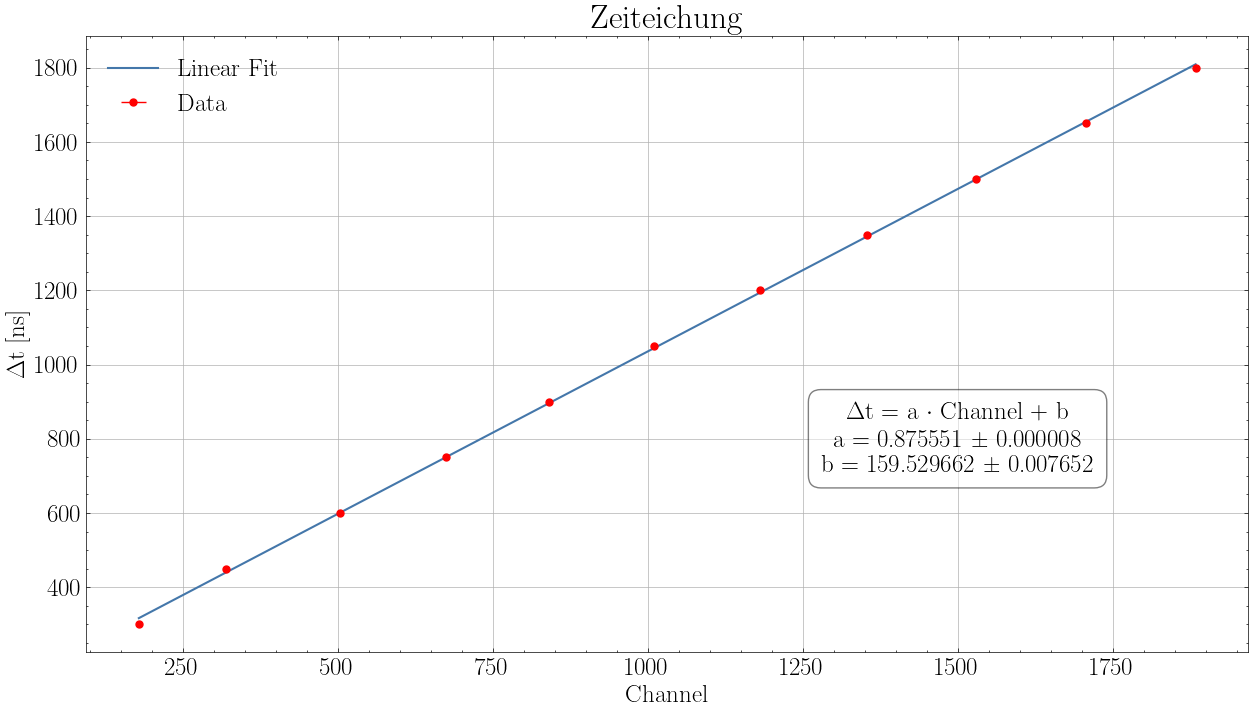

In [28]:
fig = plt.figure(figsize=[15,8], dpi=100)
ax = fig.add_subplot(111)

ax.errorbar(channels,deltaT,xerr=channels_err,fmt='r.',label='Data',markersize = 10)

yfit = inter + slope*channels

ax.plot(channels,yfit,label='Linear Fit', linewidth = 1.5)

ax.text(1500, 800," $\Delta$t = a $\cdot$ Channel + b \n   a = %.6f ± %.6f \n  b = %.6f ± %.6f"%(slope,d_slope,inter,d_inter),
        horizontalalignment = "center", verticalalignment = "center",  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

ax.set_xlabel("Channel")
ax.set_ylabel("$\Delta$t [ns]")
ax.set_title("Zeiteichung",fontsize = 24)

ax.legend()
ax.grid()
plt.savefig("bilder/timeLinearFit.pdf")

# Langzeitmessung

Messzeitraum:
- Start 31.05.2024 13:45
- Ende 24.06.2024 13:52

In [29]:
T_start = pd.to_datetime('2024-05-31 13:45')
T_end = pd.to_datetime('2024-06-24 13:52')

gesT = (T_end - T_start).total_seconds()
gesT

2074020.0

In [30]:
# lang  = pd.read_csv("data/langzeitmessung_Wichtig.dat", names= ["intens"])
lang  = pd.read_csv("data/langzeitmessung_4486550_2024-06-24_13-52.dat", names= ["intens"])


In [31]:
lang.describe()

,intens
count,8064.000000
mean,1.199033
std,2.524481
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,32.000000


anfang 8064 bins

In [32]:
lang.sum()

intens    9669
dtype: int64

1. rebin
2. err wurzel n auf bin
3. zeitumrechnung
4. poisson error

In [33]:
rebin = 144
# rebin = 144 # würde eigentlich auch perfekt aufgehen aber irgendwie funktioniert der fit dann nichtmehr keine ahnung wieso :(
# rebin = 128
# rebin = 168 

In [34]:
#Anzahl der neuen Bins
8064/rebin

56.0

In [35]:
lang["intens"] = lang.groupby(lang.index // rebin).sum()
lang = lang[:int(8064/rebin)]

# Fehler des bins

Fehler ist wurzel N

In [36]:
lang = (lang
        .assign(K = lang.index)
        .assign(err = lambda i: np.sqrt(i.intens))
)

# Zeitumrechnung

In [37]:
def dTime(k):
    a = 0.875551
    b = 159.529662
    return(rebin*a*k+b)

mal rebin da nun 1 kanal x urspüngliche enthält

In [38]:
lang = (lang
      .assign(time = lambda k: dTime(k.K))
      #.assign(time_err = 64*0.875551*0.000008)
)

Zeitfehler kann vernachlässigt werden, ist sehr klein

# Poisson Fehler

$P_{\mu}(\Delta t, n >= 1) = 1-e^{-\mu \Delta t}$

In [47]:
Ereignisse_total = 4486550

In [48]:
#mittlerer Ereignisrate
mu = Ereignisse_total/gesT

In [49]:
mu

2.1632144338048813

In [51]:
rebin*0.875551E-9

1.26079344e-07

In [52]:
PMu = 1- np.exp(-mu*rebin*0.875551E-9)

In [53]:
PMu

np.float64(2.727366195109937e-07)

Bisher WK für untergunderegnisse, anzahl = Wk * Gesamtereignisse

In [54]:
poiss_err = 1.7E6 * PMu

In [55]:
poiss_err

np.float64(0.4636522531686893)

In [56]:
lang["intens"] = lang["intens"] - poiss_err

# Fit

In [57]:
def expFit(x, A, k):
    return A * np.exp(-k * x)

In [61]:
expX

array([2681.116542, 2807.195886, 2933.27523 , 3059.354574, 3185.433918,
       3311.513262, 3437.592606, 3563.67195 , 3689.751294, 3815.830638,
       3941.909982, 4067.989326, 4194.06867 , 4320.148014, 4446.227358,
       4572.306702, 4698.386046, 4824.46539 , 4950.544734, 5076.624078,
       5202.703422, 5328.782766, 5454.86211 , 5580.941454, 5707.020798,
       5833.100142, 5959.179486, 6085.25883 , 6211.338174, 6337.417518,
       6463.496862, 6589.576206, 6715.65555 , 6841.734894, 6967.814238,
       7093.893582])

In [62]:
expX = np.asarray(lang['time'][20:])
expY = np.asarray(lang['intens'][20:])
expY_err = np.asarray(lang['err'][20:])



## Betrachtung aller Ereignisse

In [63]:
#alle Einträge
alleeinträge = sum([lang['intens'][i] for i in range(len(lang))])

In [64]:
alleeinträge

np.float64(9643.035473822532)

In [65]:
#nicht verwendbare Einträge
anfangsEinträge = sum([lang['intens'][i] for i in range(20)])

In [66]:
alleeinträge-anfangsEinträge

np.float64(2799.3085188859113)

- Es können nur etwa 1200 Einträge zum fitten verwendet werden!!!
- Es können nun etwa 3257 Einträge gefittet werden, was das ergebnis deutlich genauer macht!

### Fit exponentiell

In [81]:
poptExp, pcovExp = curve_fit(expFit, expX, expY, p0=[60, 1E-4],sigma=expY_err,absolute_sigma=True)

#1/poptExp[1]

In [82]:
A = poptExp[0]
lam = poptExp[1]
d_A = np.sqrt(pcovExp[0][0])
d_lam = np.sqrt(pcovExp[1][1])
print(d_lam)

1.65528777387043e-05


In [83]:
(1/(lam*lam)) * d_lam

np.float64(68.93388474648023)

In [84]:
lam
lebensdauer = 1/lam

In [85]:
lebensdauer

np.float64(2040.7021554413543)

- mittlere Lebensdauer = 2041 [ns] (bei binning von 128)
- 2049 ns bei binning von 144 --> sind jetzt 2040ns weil untergrund am anfang falsch berechnet!
- 2045 ns bei binning von 168

In [88]:
(1-(lebensdauer/lebensdauer_literaturwert))*100

np.float64(7.11334952124284)

Literaturwert Myonen Lebensdauer:
2196, 9811 ns

In [87]:
lebensdauer_literaturwert = 2196.9811

Etwa 6,7 % Abweichung zum Literaturwert
- sind jetzt 7.11%

In [77]:
#linearer Fit
#expX = np.asarray(lang['time'][20:])
#expYLog = np.asarray(np.log(lang['intens'][20:]))
#expY_errLog = np.asarray(np.log(lang['err'][20:]))

In [78]:
#a_fitLin,covlin=curve_fit(linearFunc,expX,expYLog,sigma=expY_errLog,absolute_sigma=True)

#1/a_fitLin[1]

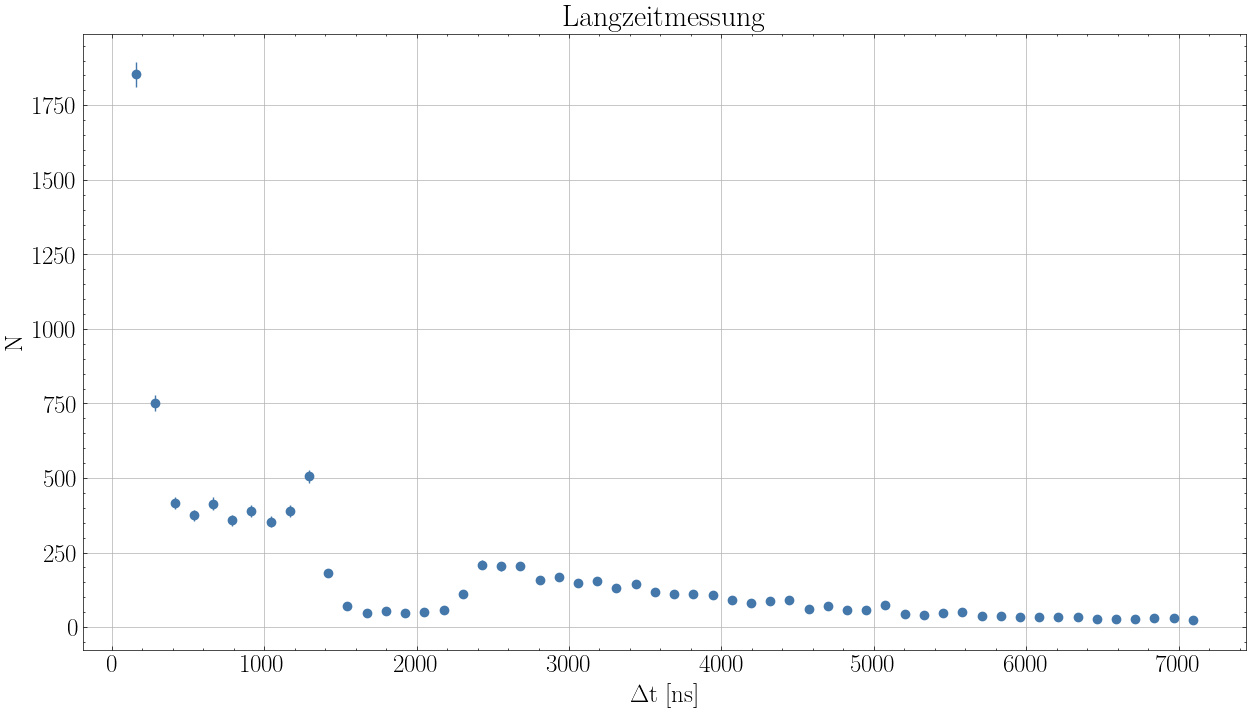

In [79]:
fig = plt.figure(figsize=[15,8], dpi=100)
ax = fig.add_subplot(111)



ax.grid()
ax.errorbar(lang["time"],lang["intens"],yerr =lang["err"], fmt='o')

ax.set_title("Langzeitmessung")
ax.set_xlabel("$\Delta$t [ns]")
ax.set_ylabel("N")

plt.savefig("bilder/langzeitMess.pdf")

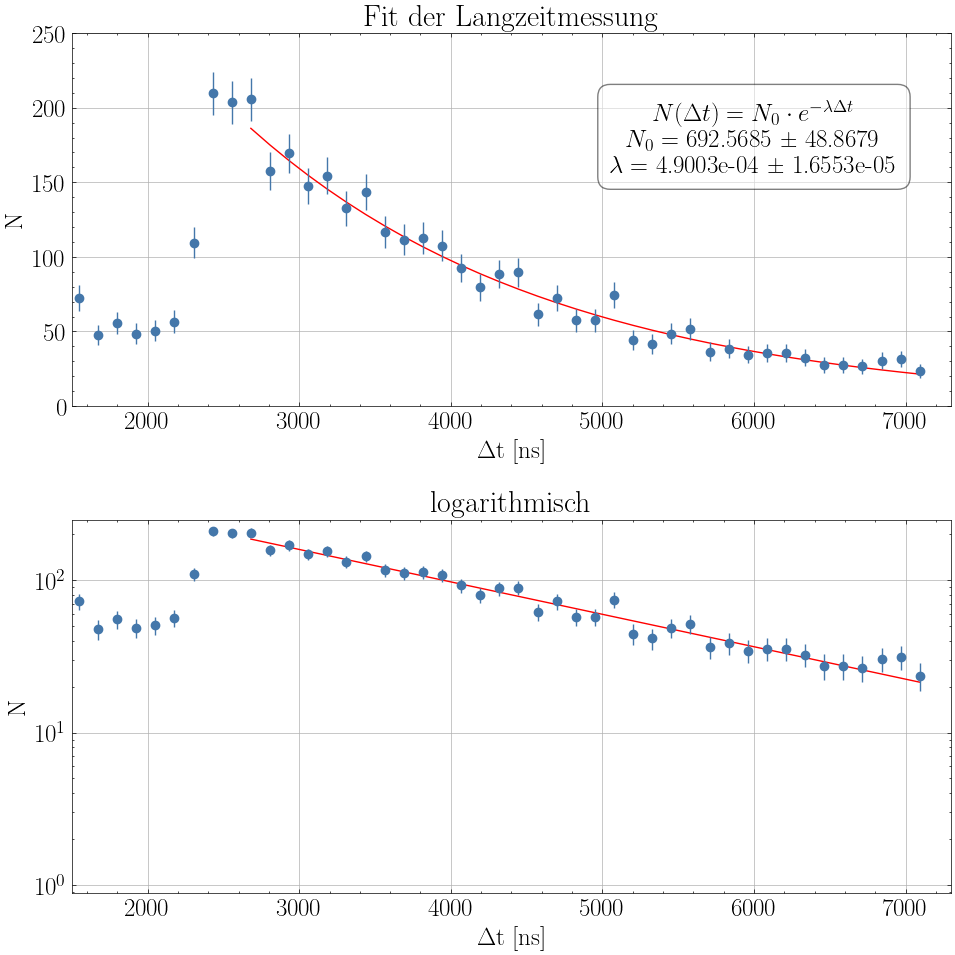

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
#
axs[0].set_xlim(xmin = 1500, xmax = 7300)
#ax.set_yscale("log")
axs[0].set_ylim(ymax= 250)

#ax.errorbar(expX,expYLog,yerr =expY_errLog, fmt='o')
#ax.plot(expX, linearFunc(expX,*a_fitLin), color='red', label='Exponential-Fit')

axs[0].grid()
axs[0].plot(expX, expFit(expX,*poptExp), color='red', label='Exponential-Fit')
axs[0].errorbar(lang["time"],lang["intens"],yerr =lang["err"], fmt='o')

axs[0].set_title("Fit der Langzeitmessung")
axs[0].set_xlabel("$\Delta$t [ns]")
axs[0].set_ylabel("N")

axs[0].text(6000, 180," $N(\Delta t) = N_0 \cdot e^{-\lambda \Delta t}$\n   $N_0$ = %.4f ± %.4f \n  $\lambda$ = %.4e ± %.4e"%(A,d_A,lam,d_lam),
        horizontalalignment = "center", verticalalignment = "center",  bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))


axs[1].set_xlim(xmin = 1500, xmax = 7300)
axs[1].set_yscale("log")
axs[1].set_ylim(ymax= 250)



axs[1].grid()
axs[1].plot(expX, expFit(expX,*poptExp), color='red', label='Exponential-Fit')
axs[1].errorbar(lang["time"],lang["intens"],yerr =lang["err"], fmt='o')

axs[1].set_title("logarithmisch")
axs[1].set_xlabel("$\Delta$t [ns]")
axs[1].set_ylabel("log(N)")

fig.tight_layout()
plt.savefig("bilder/FitlangzeitMess.pdf")
#plt.show()


# Das ist ein Test, hier ist die neueste Änderung von Flo von 1:03 29.06.